In [110]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np, get_pd_file_list
from main.draw_tools.decorations import b2helix, watermark

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/v16_pi0calib_sigext/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/v26_pi0calib_sigext/'
# base_file_loc =  '/media/jykim/T7/storage/01_recon/v26_pi0calib_sigext_v2skim/'

# base_file_loc =  '/media/jykim/T7/storage/01_recon/v9mask_pi0calib_sigext/'

base_filter =  'D0_M>1.67 && D0_M<2.06'
base_filter += ' && Pi0_Prob<0.9'
tree = 'kshort'

variables=['D0_M','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','Pi0_Prob','gamma_E','__ncandidates__','__candidate__']
var = 'D0_M'

In [16]:
ccbar_0 = base_file_loc + 'topo/resultfile/result_kshort/standard.root'

uubar_0 = base_file_loc + 'generic_uubar.root'
ddbar_0 = base_file_loc + 'generic_ddbar.root'
ssbar_0 = base_file_loc + 'generic_ssbar.root'
charged_0 = base_file_loc + 'generic_charged.root'
mixed_0 = base_file_loc + 'generic_mixed.root'
taupair_0 = base_file_loc + 'generic_taupair.root'


ccbar_0 = base_file_loc + 'ccbar/recon_output_*.root'
uubar_0 = base_file_loc + 'uubar/recon_output_*.root'
ddbar_0 = base_file_loc + 'ddbar/recon_output_*.root'
ssbar_0 = base_file_loc + 'ssbar/recon_output_*.root'
charged_0 = base_file_loc + 'charged/recon_output_*.root'
mixed_0 = base_file_loc + 'mixed/recon_output_*.root'
taupair_0 = base_file_loc + 'taupair/recon_output_*.root'

In [17]:
base_filter = base_filter
varaiables = variables
tree=tree

pd_ccbar_0 = get_pd(file=ccbar_0, tree=tree,base_filter=base_filter,variables=variables)

pd_uubar_0 = get_pd(file=uubar_0, tree=tree,base_filter=base_filter,variables=variables)

pd_ddbar_0 = get_pd(file=ddbar_0, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=ssbar_0, tree=tree,base_filter=base_filter,variables=variables)

pd_charged_0 = get_pd(file=charged_0, tree=tree,base_filter=base_filter,variables=variables)

pd_mixed_0 = get_pd(file=mixed_0, tree=tree,base_filter=base_filter,variables=variables)

pd_taupair_0 = get_pd(file=taupair_0, tree=tree,base_filter=base_filter,variables=variables)


D0_M


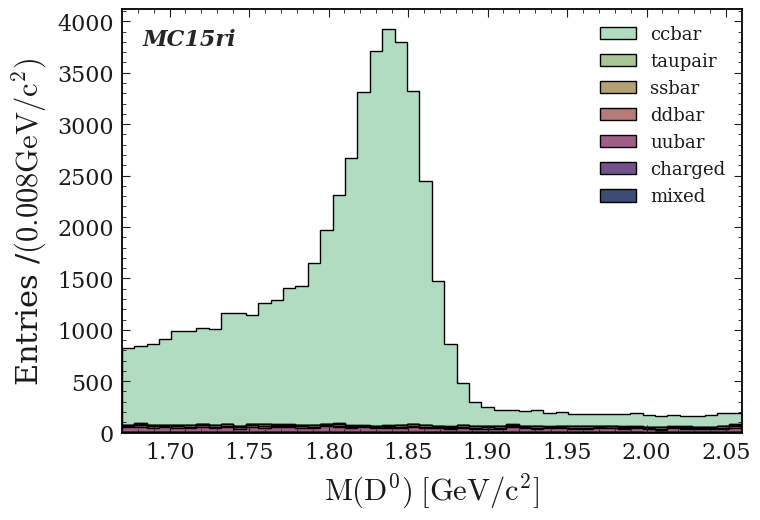

<Figure size 800x550 with 0 Axes>

In [18]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_mixed_0[var] }
    charged_bkg = {var : pd_charged_0[var] }
    ccbar_bkg = {var : pd_ccbar_0[var] }
    uubar_bkg = {var : pd_uubar_0[var] }
    ddbar_bkg = {var : pd_ddbar_0[var] }
    ssbar_bkg = {var : pd_ssbar_0[var] }
    taupair_bkg = {var : pd_taupair_0[var] }
    
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

__ncandidates__


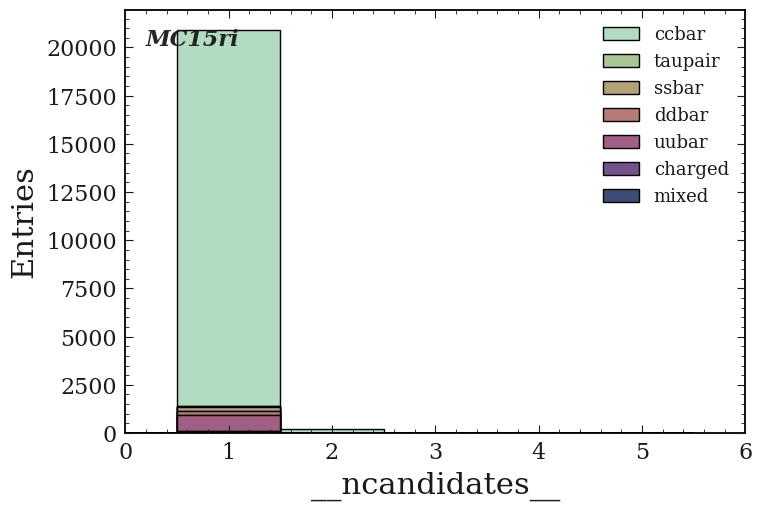

<Figure size 800x550 with 0 Axes>

In [10]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["__ncandidates__"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_mixed_0[var] }
    charged_bkg = {var : pd_charged_0[var] }
    ccbar_bkg = {var : pd_ccbar_0[var] }
    uubar_bkg = {var : pd_uubar_0[var] }
    ddbar_bkg = {var : pd_ddbar_0[var] }
    ssbar_bkg = {var : pd_ssbar_0[var] }
    taupair_bkg = {var : pd_taupair_0[var] }
    
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0,6)
    xbins = np.linspace(*xrange,7)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black',align='left')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(xrange[0],xrange[1])
#     ax.set_ylim(0,6000)

    plt.xlabel("__ncandidates__")
    width = xe[1]-xe[0]
    plt.ylabel('Entries');
    plt.show()
    plt.clf()

In [321]:
test_merged_pd  = pd.concat([pd_ccbar_0,pd_uubar_0,pd_ddbar_0,pd_ssbar_0,pd_charged_0,pd_mixed_0,pd_taupair_0] )
print(len(test_merged_pd))


14414


In [322]:
print(len(test_merged_pd.query('__candidate__==0')))

14346


In [323]:
(42592-42199)/42199


0.009313016896134979

In [374]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/v9mask_pi0calib_sigext/'

base_file_loc =  '/media/jykim/T7/storage/01_recon/v16_pi0calib_sigext/'
# base_file_loc =  '/media/jykim/T7/storage/01_recon/v16_pi0calib_sigext_naive_skim/'
# base_file_loc =  '/media/jykim/T7/storage/01_recon/v16_pi0calib_sigext_naive_skim_try2/'
# base_file_loc =  '/media/jykim/T7/storage/01_recon/v16_pi0calib_sigext_try2/'

# base_file_loc =  '/media/jykim/T7/storage/01_recon/v18_pi0calib_sigext_naive_skim/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/v26_pi0calib_sigext/'
# base_file_loc =  '/media/jykim/T7/storage/01_recon/v26_pi0calib_sigext_v2skim/'


# base_filter =  'kshort_rank_Dstp==1 &&D0_M>1.67 && D0_M<2.06  '
base_filter =  'D0_M>1.67 && D0_M<2.06 && Pi0veto_Easym <0.8'
# base_filter += ' && Pi0_Prob<0.9'
# base_filter += ' && Pi0_soft_E>0.05'
tree = 'kshort'
# tree = 'kshortpi0'

variables=['D0_M','D0_D0_M_before','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','Pi0_Prob','Pi0veto_Easym','__ncandidates__', \
           'Pi0_soft_clusterSecondMoment','Pi0_soft_clusterLAT','Pi0_soft_clusterAbsZernikeMoment51','Pi0_soft_clusterAbsZernikeMoment40','Pi0_soft_clusterE9E21','Pi0_soft_clusterE1E9','Pi0_soft_clusterZernikeMVA','Pi0_soft_clusterTheta','ROE_Pi0_InvM']
variables+=['gamma_E','Pi0veto_cosHelicityAngleMomentum','Pi0_soft_E']
# variables+=['gamma_E','Pi0_soft_E']

# variables=['D0_M','Pi0_Prob']
var = 'D0_M'

In [375]:
ccbar_0 = base_file_loc + 'topo/resultfile/result_kshort/standard.root'
# ccbar_0 = base_file_loc + 'topo/resultfile/result_kshortpi0/standard.root'

#ccbar_0 = base_file_loc + 'topo/generic_ccbar.root'
uubar_0 = base_file_loc + 'generic_uubar.root'
ddbar_0 = base_file_loc + 'generic_ddbar.root'
ssbar_0 = base_file_loc + 'generic_ssbar.root'
charged_0 = base_file_loc + 'generic_charged.root'
mixed_0 = base_file_loc + 'generic_mixed.root'
taupair_0 = base_file_loc + 'generic_taupair.root'


# ccbar_0 = base_file_loc + 'ccbar/recon_output_*.root'
# uubar_0 = base_file_loc + 'uubar/recon_output_*.root'
# ddbar_0 = base_file_loc + 'ddbar/recon_output_*.root'
# ssbar_0 = base_file_loc + 'ssbar/recon_output_*.root'
# charged_0 = base_file_loc + 'charged/recon_output_*.root'
# mixed_0 = base_file_loc + 'mixed/recon_output_*.root'
# taupair_0 = base_file_loc + 'taupair/recon_output_*.root'


In [192]:
kshortpi0_filter = base_filter + ' && (iCascDcyBrP_Dst_0==1 || iCascDcyBrP_Dst_0==17)'

kshorteta_filter = base_filter + ' && (iCascDcyBrP_Dst_0==9 || iCascDcyBrP_Dst_0==131 || iCascDcyBrP_Dst_0==157)'

remaining_filter = base_filter + '&& iCascDcyBrP_Dst_0!=9 && iCascDcyBrP_Dst_0!=131 && iCascDcyBrP_Dst_0!=157 && iCascDcyBrP_Dst_0!=1 && iCascDcyBrP_Dst_0!=17'




In [376]:
kshortpi0_filter = base_filter + ' && (gamma_genMotherID==Pi0_soft_genMotherID && gamma_genMotherPDG==Pi0_soft_genMotherPDG)'

kshorteta_filter = base_filter + ' && (gamma_genMotherID!=Pi0_soft_genMotherID && gamma_genMotherPDG==Pi0_soft_genMotherPDG)'

remaining_filter = base_filter + '&& (gamma_genMotherPDG!=Pi0_soft_genMotherPDG)'




In [21]:
kshortpi0_filter = base_filter + ' && (iCascDcyBrP_Dst_0==1 || iCascDcyBrP_Dst_0==14)'

kshorteta_filter = base_filter + ' && (iCascDcyBrP_Dst_0==8 || iCascDcyBrP_Dst_0==114 )'

remaining_filter = base_filter + '&& iCascDcyBrP_Dst_0!=8 && iCascDcyBrP_Dst_0!=114 && iCascDcyBrP_Dst_0!=1 && iCascDcyBrP_Dst_0!=14'


kshortpi0_filter = base_filter 

kshorteta_filter = base_filter + ' && D0_M<0'

remaining_filter = base_filter + ' && D0_M<0'

In [377]:
base_filter = base_filter
varaiables = variables
tree=tree

pd_ccbar_kshortpi0 = get_pd(file=ccbar_0, tree=tree,base_filter=kshortpi0_filter,variables=variables)
pd_ccbar_kshorteta = get_pd(file=ccbar_0, tree=tree,base_filter=kshorteta_filter,variables=variables)
pd_ccbar_remain = get_pd(file=ccbar_0, tree=tree,base_filter=remaining_filter,variables=variables)



pd_uubar_0 = get_pd(file=uubar_0, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar_0 = get_pd(file=ddbar_0, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=ssbar_0, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=charged_0, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=mixed_0, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair_0 = get_pd(file=taupair_0, tree=tree,base_filter=base_filter,variables=variables)


In [378]:
#plt.hist(pd_taupair_0[var], bins=xbins, histtype='stepfilled', stacked=True,label='taupair',edgecolor='black')
# plt.hist(pd_mixed_0[var], bins=xbins, histtype='stepfilled', stacked=True,label='taupair',edgecolor='black')
# plt.hist(pd_charged_0[var], bins=xbins, histtype='stepfilled', stacked=True,label='taupair',edgecolor='black')
# plt.hist(pd_ssbar_0[var], bins=xbins, histtype='stepfilled', stacked=True,label='taupair',edgecolor='black')


D0_M


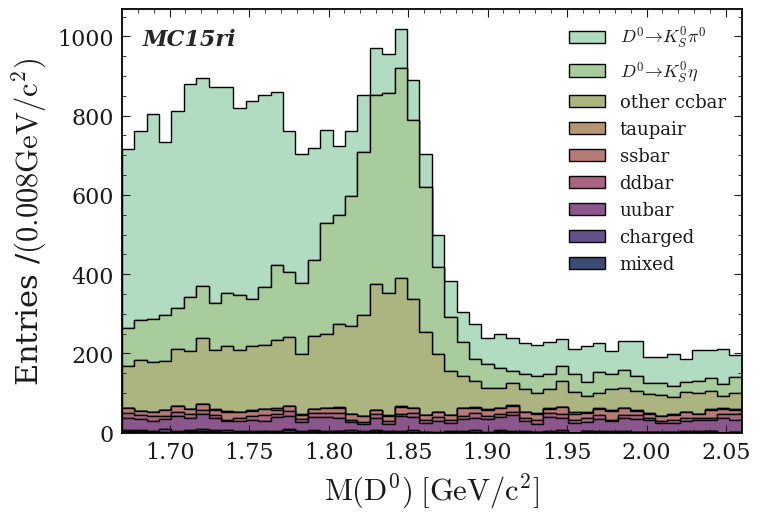

<Figure size 800x550 with 0 Axes>

In [379]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','other ccbar',r'$D^0 \to K_S^0 \eta$',r'$D^0 \to K_S^0 \pi^0$']


colors=b2helix(len(labels))

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_mixed_0[var] }
    charged_bkg = {var : pd_charged_0[var] }
    ccbar_bkg = {var : pd_ccbar_remain[var] }
    uubar_bkg = {var : pd_uubar_0[var] }
    ddbar_bkg = {var : pd_ddbar_0[var] }
    ssbar_bkg = {var : pd_ssbar_0[var] }
    taupair_bkg = {var : pd_taupair_0[var] }
    kshort_eta = {var : pd_ccbar_kshorteta[var] }
    kshort_pi0 = {var : pd_ccbar_kshortpi0[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], kshort_eta[var], kshort_pi0[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_M


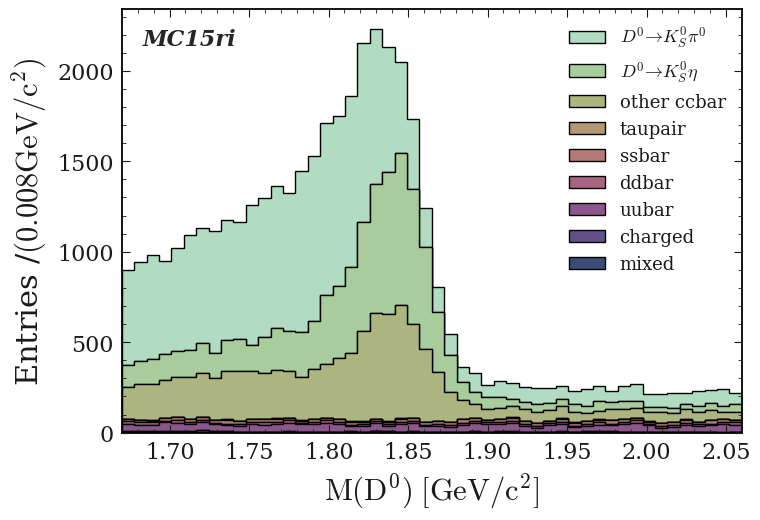

<Figure size 800x550 with 0 Axes>

In [315]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','other ccbar',r'$D^0 \to K_S^0 \eta$',r'$D^0 \to K_S^0 \pi^0$']


colors=b2helix(len(labels))

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_mixed_0[var] }
    charged_bkg = {var : pd_charged_0[var] }
    ccbar_bkg = {var : pd_ccbar_remain[var] }
    uubar_bkg = {var : pd_uubar_0[var] }
    ddbar_bkg = {var : pd_ddbar_0[var] }
    ssbar_bkg = {var : pd_ssbar_0[var] }
    taupair_bkg = {var : pd_taupair_0[var] }
    kshort_eta = {var : pd_ccbar_kshorteta[var] }
    kshort_pi0 = {var : pd_ccbar_kshortpi0[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], kshort_eta[var], kshort_pi0[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

Pi0_Prob


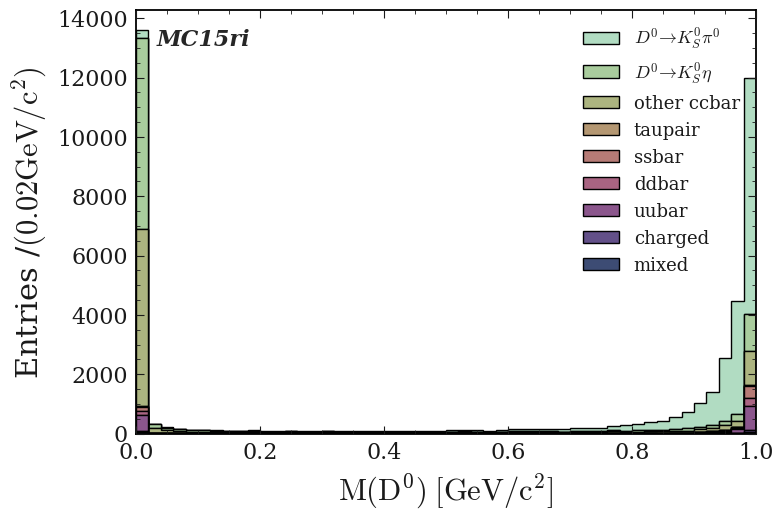

<Figure size 800x550 with 0 Axes>

In [316]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','other ccbar',r'$D^0 \to K_S^0 \eta$',r'$D^0 \to K_S^0 \pi^0$']


colors=b2helix(len(labels))

data_list=dict()
signal_variables = ["Pi0_Prob"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_mixed_0[var] }
    charged_bkg = {var : pd_charged_0[var] }
    ccbar_bkg = {var : pd_ccbar_remain[var] }
    uubar_bkg = {var : pd_uubar_0[var] }
    ddbar_bkg = {var : pd_ddbar_0[var] }
    ssbar_bkg = {var : pd_ssbar_0[var] }
    taupair_bkg = {var : pd_taupair_0[var] }
    kshort_eta = {var : pd_ccbar_kshorteta[var] }
    kshort_pi0 = {var : pd_ccbar_kshortpi0[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], kshort_eta[var], kshort_pi0[var]]  

#     for labeling in labels:
    xrange=(0,1)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

In [273]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','other ccbar',r'$D^0 \to K_S^0 \eta$',r'$D^0 \to K_S^0 \pi^0$']


colors=b2helix(len(labels))

data_list=dict()
signal_variables = ["__ncandidates__"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_mixed_0[var] }
    charged_bkg = {var : pd_charged_0[var] }
    ccbar_bkg = {var : pd_ccbar_remain[var] }
    uubar_bkg = {var : pd_uubar_0[var] }
    ddbar_bkg = {var : pd_ddbar_0[var] }
    ssbar_bkg = {var : pd_ssbar_0[var] }
    taupair_bkg = {var : pd_taupair_0[var] }
    kshort_eta = {var : pd_ccbar_kshorteta[var] }
    kshort_pi0 = {var : pd_ccbar_kshortpi0[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], kshort_eta[var], kshort_pi0[var]]  

#     for labeling in labels:
    xrange=(0,6)
    xbins = np.linspace(*xrange,7)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black',align='left')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(xrange[0],xrange[1])
#     ax.set_ylim(0,6000)

    plt.xlabel("__ncandidates__")
    width = xe[1]-xe[0]
    plt.ylabel('Entries');
    plt.show()
    plt.clf()

__ncandidates__


KeyError: '__ncandidates__'

In [380]:
var ='D0_M'
weights = None
data_list = [pd_mixed_0[var], pd_charged_0[var], pd_uubar_0[var], pd_ddbar_0[var], pd_ssbar_0[var], pd_taupair_0[var], pd_ccbar_remain[var], pd_ccbar_kshorteta[var], pd_ccbar_kshortpi0[var]]
merged_pd = pd.concat( [pd_mixed_0[var], pd_charged_0[var], pd_uubar_0[var], pd_ddbar_0[var], pd_ssbar_0[var], pd_taupair_0[var], pd_ccbar_remain[var], pd_ccbar_kshorteta[var], pd_ccbar_kshortpi0[var]]
)
scale = 174.90/400
# scale = 1

In [381]:
if weights is None:
    weights = []
    for i,d in enumerate(data_list):
        wei = np.ones(len(d))
        if scale is not None:
            if isinstance(scale, int) or isinstance(scale, float):
                if not isinstance(scale, bool):
                    wei *= scale
            elif isinstance(scale, dict):
                assert cats[i] in scale.keys(), "Scale list must have same lenght as data"
                wei *= scale[cats[i]]
            else:
                print("Please provide int or float with scale")
        weights.append(wei)

In [382]:
weights

[array([0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725,
        0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725,
        0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725,
        0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725,
        0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725,
        0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725,
        0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725,
        0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725,
        0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725,
        0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725,
        0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725,
        0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725,
        0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725,
        0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725, 0.43725,
      

In [383]:
base_file = '/media/jykim/T7/storage/grid/v26_mask_prmpt_all_4S_v1/sub'
file_list = list()
for i in range(0,22):
    number = format(i, '02')
    file_name = base_file + number + '/output_*.root'
    file_list.append(file_name)

In [384]:
file_list

['/media/jykim/T7/storage/grid/v26_mask_prmpt_all_4S_v1/sub00/output_*.root',
 '/media/jykim/T7/storage/grid/v26_mask_prmpt_all_4S_v1/sub01/output_*.root',
 '/media/jykim/T7/storage/grid/v26_mask_prmpt_all_4S_v1/sub02/output_*.root',
 '/media/jykim/T7/storage/grid/v26_mask_prmpt_all_4S_v1/sub03/output_*.root',
 '/media/jykim/T7/storage/grid/v26_mask_prmpt_all_4S_v1/sub04/output_*.root',
 '/media/jykim/T7/storage/grid/v26_mask_prmpt_all_4S_v1/sub05/output_*.root',
 '/media/jykim/T7/storage/grid/v26_mask_prmpt_all_4S_v1/sub06/output_*.root',
 '/media/jykim/T7/storage/grid/v26_mask_prmpt_all_4S_v1/sub07/output_*.root',
 '/media/jykim/T7/storage/grid/v26_mask_prmpt_all_4S_v1/sub08/output_*.root',
 '/media/jykim/T7/storage/grid/v26_mask_prmpt_all_4S_v1/sub09/output_*.root',
 '/media/jykim/T7/storage/grid/v26_mask_prmpt_all_4S_v1/sub10/output_*.root',
 '/media/jykim/T7/storage/grid/v26_mask_prmpt_all_4S_v1/sub11/output_*.root',
 '/media/jykim/T7/storage/grid/v26_mask_prmpt_all_4S_v1/sub12/ou

In [385]:
base_filter=' D0_M>1.67 && D0_M<2.06  && Pi0veto_Easym <0.8'
# base_filter += ' && Pi0_Prob<0.9'
tree = 'kshort'
variables=['D0_M','D0_D0_M_before','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','Pi0_Prob','Pi0_Prob','Pi0veto_Easym',\
           'Pi0_soft_clusterSecondMoment','Pi0_soft_clusterLAT','Pi0_soft_clusterAbsZernikeMoment51','Pi0_soft_clusterAbsZernikeMoment40','Pi0_soft_clusterE9E21','Pi0_soft_clusterE1E9','Pi0_soft_clusterZernikeMVA','Pi0_soft_clusterTheta','ROE_Pi0_InvM']
variables+=['Pi0veto_cosHelicityAngleMomentum','Eta_Prob','Pi0_soft_E']

In [386]:
prompt_pd = get_pd_file_list(file_list=file_list, tree='kshort', base_filter=base_filter, variables=variables)

In [387]:
# file = '/media/jykim/T7/storage_b2/storage/pi0calib_23_pr_all_4S_v1/output_*.root'
# file = '/media/jykim/T7/storage_b2/storage/v16_23_pr_all_4S_v1/output_*.root'
# # file = '/media/jykim/T7/storage/grid/fbdtv18_23_pr_all_4S_v1/output_*.root'


# tree = 'kshort'
# # tree = 'kshortpi0'

# #variables = ['D0_M',"D0_cosHel_0"]
# # base_filter='kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '
# base_filter=' D0_M>1.67 && D0_M<2.06 '

# # base_filter += ' && Pi0_Prob<0.9'
# # base_filter +=  ' && Pi0_soft_E>0.05'
# #base_filter=' D0_M>1.67 && D0_M<2.06 '

# variables=['D0_M','D0_D0_M_before','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','Pi0_Prob','Pi0_Prob','Pi0veto_Easym',\
#            'Pi0_soft_clusterSecondMoment','Pi0_soft_clusterLAT','Pi0_soft_clusterAbsZernikeMoment51','Pi0_soft_clusterAbsZernikeMoment40','Pi0_soft_clusterE9E21','Pi0_soft_clusterE1E9','Pi0_soft_clusterZernikeMVA','Pi0_soft_clusterTheta','ROE_Pi0_InvM']
# variables+=['Pi0veto_cosHelicityAngleMomentum','Eta_Prob','Pi0_soft_E']
# # variables+=['gamma_E']
# # tree='kshort'

# prompt_pd = get_pd(file=file , tree=tree, variables=variables ,base_filter=base_filter)
 

In [388]:
# plt.hist(prompt_pd1['D0_M'],bins=np.linspace(1.8,1.9,51), density=True, histtype='step');
# plt.hist(prompt_pd['D0_M'],bins=np.linspace(1.8,1.9,51), density=True, histtype='step');

In [389]:
# plt.hist(prompt_pd['D0_M'],bins=np.linspace(1.67,2.06,51));

In [390]:
# plt.hist(prompt_pd['Eta_Prob'],bins=np.linspace(0,1,51))

In [391]:
error_weights = None

In [392]:
if error_weights is None:
    #error_weights = np.ones(len(merged_pd))
    error_weights = np.ones(len(prompt_pd))

In [393]:
if scale is not None:
    if isinstance(scale, int) or isinstance(scale, float):
        if not isinstance(scale, bool):
            error_weights *= scale
    else:
        print("Please provide int or float with scale")
else:
    scale = 1

In [394]:
error_weights

array([0.43725, 0.43725, 0.43725, ..., 0.43725, 0.43725, 0.43725])

In [395]:
y, xe = np.histogram(prompt_pd['D0_M'], bins=50, range=(1.67,2.06), density=False)
# y, xe = np.histogram(prompt_pd['D0_M'], bins=50, range=(1.67,2.06), density=False, weights=error_weights)

#y, x = np.histogram(merged_pd, bins=50, range=(1.67,2.06), density=False, weights=error_weights)


In [396]:
y

array([299, 326, 319, 354, 357, 336, 299, 320, 374, 355, 336, 353, 309,
       309, 255, 310, 309, 305, 336, 354, 401, 425, 365, 312, 242, 187,
       144, 113, 106,  94,  83,  78,  87,  76, 102,  77, 117,  89,  93,
        97,  84,  90,  88, 112,  88,  95,  80, 103,  88,  86])

In [397]:
error_scale = 1
    # https://www-cdf.fnal.gov/physics/statistics    
err = (-0.5 + np.sqrt(np.array(y*scale + 0.25)), +0.5 + np.sqrt(np.array(y*scale + 0.25)))  # np.sqrt(np.array(y))
#err = (-0.5 + np.sqrt(np.array(y*scale)), +0.5 + np.sqrt(np.array(y*scale)))  # np.sqrt(np.array(y))
#err = (- np.sqrt(np.array(y)),  + np.sqrt(np.array(y)))


err = (-0.5 + np.sqrt(np.array(y*error_scale)), +0.5 + np.sqrt(np.array(y*error_scale)))

err = (-0.5 + np.sqrt(np.array(y*error_scale + 0.25)), +0.5 + np.sqrt(np.array(y*error_scale + 0.25)))  # np.sqrt(np.array(y))

err = (np.sqrt(np.array(y*error_scale)),  np.sqrt(np.array(y*error_scale)))  # np.sqrt(np.array(y))

err = np.sqrt(np.array(y*error_scale))  # np.sqrt(np.array(y))


In [398]:
# y, xe = np.histogram(prompt_pd['D0_M'], bins=50, range=(1.67,2.06), density=False)
# y, xe = np.histogram(prompt_pd['D0_M'], bins=50, range=(1.67,2.06), density=True)

data_MC_weights = None
if data_MC_weights is None:
    data_MC_weights = np.ones(len(merged_pd))
    #error_weights = np.ones(len(prompt_pd))
if scale is not None:
    if isinstance(scale, int) or isinstance(scale, float):
        if not isinstance(scale, bool):
            data_MC_weights *= scale
    else:
        print("Please provide int or float with scale")
else:
    scale = 1
n, xe = np.histogram(merged_pd, bins=50, range=(1.67,2.06), weights=data_MC_weights)
# n, xe = np.histogram(merged_pd, bins=50, range=(1.67,2.06), density=True)


In [399]:
ratio_error = (y/n)*np.sqrt(1/n+1./y) 
residual_error = np.sqrt(n+y) 

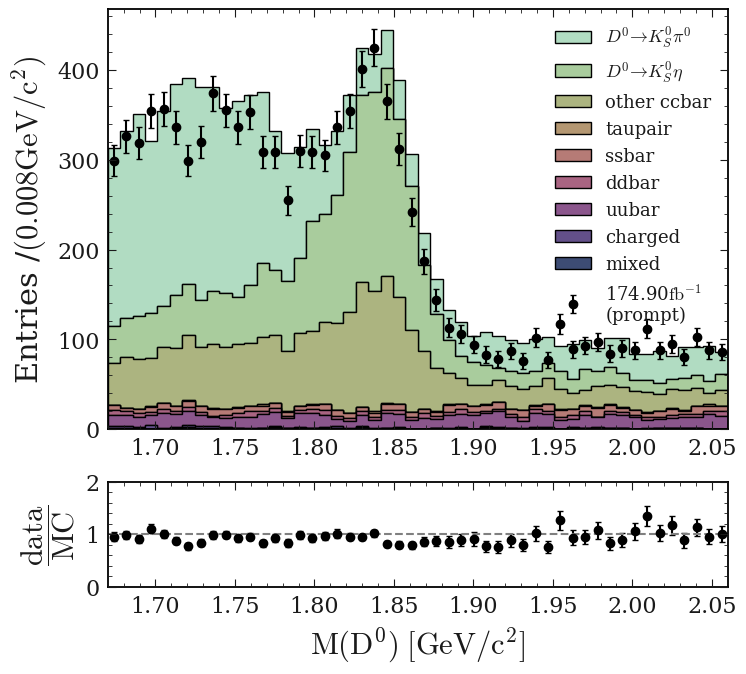

<Figure size 800x550 with 0 Axes>

In [400]:
import matplotlib.ticker as mticker
from matplotlib import gridspec
# fig = plt.figure()
#plt.figure(figsize=(800,550))
fig = plt.figure(figsize=(8, 7.5)) 
gs = gridspec.GridSpec(nrows=2, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[ 4, 1], 
#                        width_ratios=[1, 1]
                      )
#plt.subplot(2,1,1)
ax0 = plt.subplot(gs[0])
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','other ccbar',r'$D^0 \to K_S^0 \eta$',r'$D^0 \to K_S^0 \pi^0$']


colors=b2helix(len(labels))

#n, xe = np.histogram(prompt_pd, bins=50, range=(1.67,2.06), weights=error_weights)


#n, xe = np.histogram(merged_pd, bins=50, range=(1.67,2.06), weights=error_weights)






#y_error = np.sqrt(n)

xrange=(1.67,2.06)
xbins = np.linspace(*xrange,51)

plt.hist( data_list , bins=xbins, histtype='stepfilled', stacked=True,label=labels,\
#          color=colors,edgecolor='black',weights=weights, density=True,)
         color=colors,edgecolor='black',weights=weights, density=False,)

bin_centres = (xe[:-1] + xe[1:])/2.


plt.errorbar(x=bin_centres, y=y,
             yerr=err, fmt='o', capsize=2, color='black', drawstyle='steps',label=r'174.90$\mathrm{fb^{-1}}$' + '\n' + '(prompt)')

# plt.hist(prompt_pd['D0_M'],bins=xbins,density=True,histtype='step')

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width , box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
plt.legend(prop={'size':13})

# watermark(t="",logo="MC15ri")
ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

ax.set_xlim(*xrange)
# ax.set_ylim(0,100)


plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');



ax2 = plt.subplot(2,1,2)
#fig2, ax2 = plt.subplots()
#ig2.set_size_inches(, 2)
#ax.xaxis.set_major_locator(mticker.FixedLocator(np.arange(labels.size).tolist()))
#ax.set_xticklabels(labels, rotation=30, ha="right")

# plt.plot(xbins[:50],n/y)
# plt.scatter(bin_centres,(y-n)/err,color='black')
# plt.scatter(bin_centres,n/y,color='black')
# plt.scatter(bin_centres, (y-n)/(np.sqrt(y+n)),color='black')

plt.errorbar(x=bin_centres, y=y/n,
             yerr=ratio_error, fmt='o', capsize=2, color='black', drawstyle='steps',label=r'174.90$\mathrm{fb^{-1}}$' + '\n' + '(prompt)')


#plt.errorbar(x=bin_centres, y=n/y,
#              yerr=pull_err, fmt='o', capsize=2, color='black', drawstyle='steps')

#ax2 = plt.gca()
ax2.set_xlim(*xrange)
ax2.set_ylim(0,2)
# ax2.set_ylim(-5,5)

plt.axhline(y=1, color='gray', linestyle='--')
# plt.axhline(y=0, color='gray', linestyle='--')

# ax2.set_ylim(-5,5)
# plt.axhline(y=0, color='gray', linestyle='--')



plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
plt.ylabel(r"$\dfrac{\mathrm{data}}{\mathrm{MC}}$")
#plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

width = xe[1]-xe[0]



plt.show()
plt.clf()

In [401]:
scale = 174.90/400
var ='Pi0_soft_E'
# var ='Pi0_Prob'
# var = 'ROE_Pi0_InvM'
# var = 'Pi0veto_cosHelicityAngleMomentum'
# var = 'Pi0veto_Easym'
# var = 'Pi0veto_Easym'
# var = 'Pi0_soft_clusterTheta'
# xrange = (0,1)
# xlabel = '$\pi^0$ probability'

# xrange = (0.02,0.27)
# xlabel = r'$M($\gamma_1\gamma_2)\;[\mathrm{GeV/c^2}]$'

xrange = (0.055,0.6)


# xrange = (-1,1)
# xlabel = "cosHelicityAngleMomentum"


# xrange = (0,1)
xlabel = '$E_{asym}$'

# xrange = (0.2967,2.6180)
# xlabel = '$\mathrm{clustertheta}(\gamma_2)$'

xbins=50

In [402]:
weights = None
data_list = None
merged_pd = None
data_list = [pd_mixed_0[var], pd_charged_0[var], pd_uubar_0[var], pd_ddbar_0[var], pd_ssbar_0[var], pd_taupair_0[var], pd_ccbar_remain[var], pd_ccbar_kshorteta[var], pd_ccbar_kshortpi0[var]]
merged_pd = pd.concat( [pd_mixed_0[var], pd_charged_0[var], pd_uubar_0[var], pd_ddbar_0[var], pd_ssbar_0[var], pd_taupair_0[var], pd_ccbar_remain[var], pd_ccbar_kshorteta[var], pd_ccbar_kshortpi0[var]]
)

# scale = 1

if weights is None:
    weights = []
    for i,d in enumerate(data_list):
        wei = np.ones(len(d))
        if scale is not None:
            if isinstance(scale, int) or isinstance(scale, float):
                if not isinstance(scale, bool):
                    wei *= scale
            elif isinstance(scale, dict):
                assert cats[i] in scale.keys(), "Scale list must have same lenght as data"
                wei *= scale[cats[i]]
            else:
                print("Please provide int or float with scale")
        weights.append(wei)

In [403]:
error_weights = None

In [404]:
if error_weights is None:
    #error_weights = np.ones(len(merged_pd))
    error_weights = np.ones(len(prompt_pd))
if scale is not None:
    if isinstance(scale, int) or isinstance(scale, float):
        if not isinstance(scale, bool):
            error_weights *= scale
    else:
        print("Please provide int or float with scale")
else:
    scale = 1

In [405]:
y, xe = np.histogram(prompt_pd[var], bins=xbins, range=xrange, density=False)
error_scale = 1
    # https://www-cdf.fnal.gov/physics/statistics    

err = (-0.5 + np.sqrt(np.array(y*error_scale + 0.25)), +0.5 + np.sqrt(np.array(y*error_scale + 0.25)))  # np.sqrt(np.array(y))

err = ( np.sqrt(np.array(y*error_scale)),  np.sqrt(np.array(y*error_scale)))  # np.sqrt(np.array(y))


In [406]:
data_MC_weights = None
if data_MC_weights is None:
    data_MC_weights = np.ones(len(merged_pd))
    #error_weights = np.ones(len(prompt_pd))
if scale is not None:
    if isinstance(scale, int) or isinstance(scale, float):
        if not isinstance(scale, bool):
            data_MC_weights *= scale
    else:
        print("Please provide int or float with scale")
else:
    scale = 1
n, xe = np.histogram(merged_pd, bins=xbins, range=xrange, weights=data_MC_weights)

In [407]:
ratio_error = (y/n)*np.sqrt(1/n+1./y) 

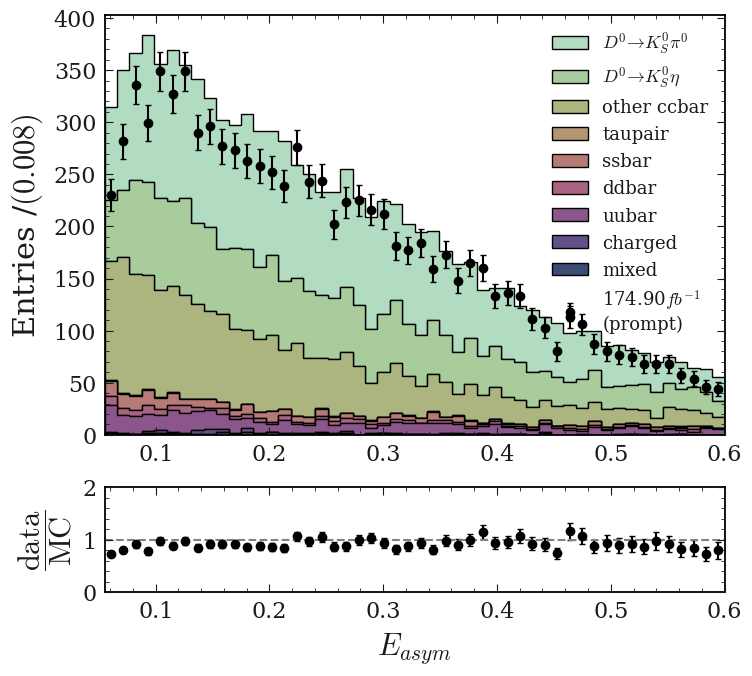

<Figure size 800x550 with 0 Axes>

In [408]:
import matplotlib.ticker as mticker
from matplotlib import gridspec
# fig = plt.figure()
#plt.figure(figsize=(800,550))
fig = plt.figure(figsize=(8, 7.5)) 
gs = gridspec.GridSpec(nrows=2, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[ 4, 1], 
#                        width_ratios=[1, 1]
                      )
#plt.subplot(2,1,1)
ax0 = plt.subplot(gs[0])
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','other ccbar',r'$D^0 \to K_S^0 \eta$',r'$D^0 \to K_S^0 \pi^0$']


colors=b2helix(len(labels))

#n, xe = np.histogram(prompt_pd, bins=50, range=(1.67,2.06), weights=error_weights)


#n, xe = np.histogram(merged_pd, bins=50, range=(1.67,2.06), weights=error_weights)


var =var
data_list = [pd_mixed_0[var], pd_charged_0[var], pd_uubar_0[var], pd_ddbar_0[var], pd_ssbar_0[var], pd_taupair_0[var], pd_ccbar_remain[var], pd_ccbar_kshorteta[var], pd_ccbar_kshortpi0[var]]





#y_error = np.sqrt(n)

xrange=xrange
xbins = np.linspace(*xrange,xbins+1)

plt.hist( data_list , bins=xbins, histtype='stepfilled', stacked=True,label=labels,\
         color=colors,edgecolor='black',weights=weights, density=False)

bin_centres = (xe[:-1] + xe[1:])/2.


plt.errorbar(x=bin_centres, y=y,
             yerr=err, fmt='o', capsize=2, color='black', drawstyle='steps',label=r'174.90$fb^{-1}$' + '\n' + '(prompt)')

#plt.hist(prompt_pd[var],bins=xbins,density=True,histtype='step')

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width , box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
# ax.legend(loc='best', bbox_to_anchor=(0, 1))   

plt.legend(prop={'size':13})
# plt.tight_layout()
# watermark(t="",logo="MC15ri")
ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

ax.set_xlim(*xrange)
# ax.set_xlim(0.02,0.2)

# ax.set_xlim(0.1,0.2)
# ax.set_ylim(0,100)

# plt.yscale('log')

plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');



ax2 = plt.subplot(2,1,2)
#fig2, ax2 = plt.subplots()
#ig2.set_size_inches(, 2)
#ax.xaxis.set_major_locator(mticker.FixedLocator(np.arange(labels.size).tolist()))
#ax.set_xticklabels(labels, rotation=30, ha="right")

# plt.plot(xbins[:50],n/y)
# plt.scatter(bin_centres,y/n,color='black')
plt.errorbar(x=bin_centres, y=y/n,
             yerr=ratio_error, fmt='o', capsize=2, color='black', drawstyle='steps',label=r'174.90$fb^{-1}$' + '\n' + '(prompt)')



#plt.errorbar(x=bin_centres, y=n/y,
#              yerr=pull_err, fmt='o', capsize=2, color='black', drawstyle='steps')

#ax2 = plt.gca()
ax2.set_xlim(*xrange)
# ax2.set_xlim(0.02,0.2)
# 

ax2.set_ylim(0,2)
plt.axhline(y=1, color='gray', linestyle='--')


# plt.xlabel("$\pi^0$ probability")
#plt.xlabel("clusterLAT($\gamma_2$)")
# plt.xlabel("cosHelicityAngleMomentum")
# plt.xlabel("$E(\gamma_{roe}) \;[\mathrm{GeV}]$")
plt.xlabel(xlabel)


# plt.xlabel("M($\gamma_1\gamma_2)\;[\mathrm{GeV/c^2}]$")

plt.ylabel(r"$\dfrac{\mathrm{data}}{\mathrm{MC}}$")
#plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

width = xe[1]-xe[0]



plt.show()
plt.clf()

/tmp/ipykernel_6866/1486021547.py:74: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(bin_centres,y/n,color='black')


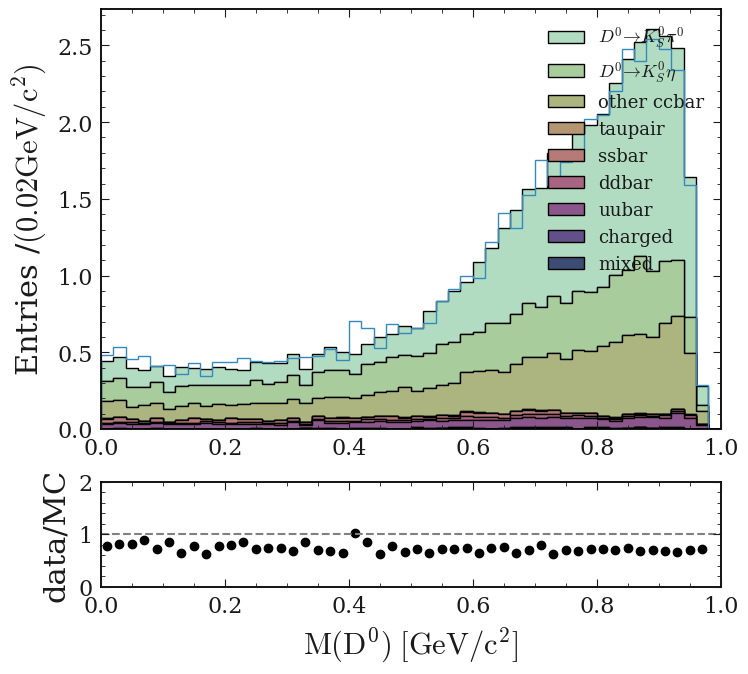

<Figure size 800x550 with 0 Axes>

In [333]:
import matplotlib.ticker as mticker
from matplotlib import gridspec
# fig = plt.figure()
#plt.figure(figsize=(800,550))
fig = plt.figure(figsize=(8, 7.5)) 
gs = gridspec.GridSpec(nrows=2, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[ 4, 1], 
#                        width_ratios=[1, 1]
                      )
#plt.subplot(2,1,1)
ax0 = plt.subplot(gs[0])
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','other ccbar',r'$D^0 \to K_S^0 \eta$',r'$D^0 \to K_S^0 \pi^0$']


colors=b2helix(len(labels))

#n, xe = np.histogram(prompt_pd, bins=50, range=(1.67,2.06), weights=error_weights)


#n, xe = np.histogram(merged_pd, bins=50, range=(1.67,2.06), weights=error_weights)


var ='Pi0veto_Easym'
data_list = [pd_mixed_0[var], pd_charged_0[var], pd_uubar_0[var], pd_ddbar_0[var], pd_ssbar_0[var], pd_taupair_0[var], pd_ccbar_remain[var], pd_ccbar_kshorteta[var], pd_ccbar_kshortpi0[var]]





#y_error = np.sqrt(n)

xrange=(0,1)
xbins = np.linspace(*xrange,51)

plt.hist( data_list , bins=xbins, histtype='stepfilled', stacked=True,label=labels,\
         color=colors,edgecolor='black',weights=weights, density=True)

bin_centres = (xe[:-1] + xe[1:])/2.


# plt.errorbar(x=bin_centres, y=y,
#              yerr=err, fmt='o', capsize=2, color='black', drawstyle='steps',label=r'174.90$fb^{-1}$' + '\n' + '(prompt)')

plt.hist(prompt_pd[var],bins=xbins,density=True,histtype='step')

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width , box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
plt.legend(prop={'size':13})

# watermark(t="",logo="MC15ri")
ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

ax.set_xlim(*xrange)
# ax.set_ylim(0,100)


plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');



ax2 = plt.subplot(2,1,2)
#fig2, ax2 = plt.subplots()
#ig2.set_size_inches(, 2)
#ax.xaxis.set_major_locator(mticker.FixedLocator(np.arange(labels.size).tolist()))
#ax.set_xticklabels(labels, rotation=30, ha="right")

# plt.plot(xbins[:50],n/y)
plt.scatter(bin_centres,y/n,color='black')

#plt.errorbar(x=bin_centres, y=n/y,
#              yerr=pull_err, fmt='o', capsize=2, color='black', drawstyle='steps')

#ax2 = plt.gca()
ax2.set_xlim(*xrange)
ax2.set_ylim(0,2)
plt.axhline(y=1, color='gray', linestyle='--')


plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
plt.ylabel("data/MC")
#plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

width = xe[1]-xe[0]



plt.show()
plt.clf()

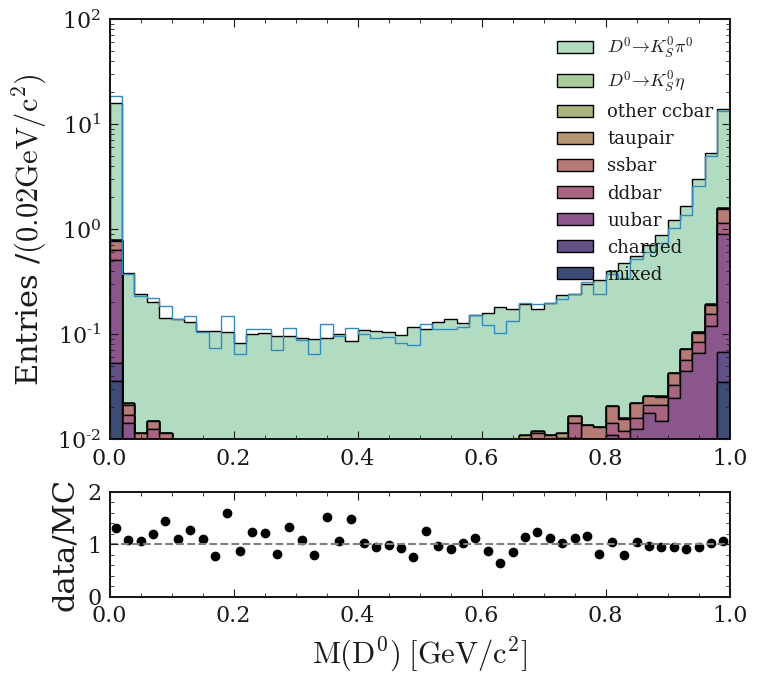

<Figure size 800x550 with 0 Axes>

In [99]:
import matplotlib.ticker as mticker
from matplotlib import gridspec
# fig = plt.figure()
#plt.figure(figsize=(800,550))
fig = plt.figure(figsize=(8, 7.5)) 
gs = gridspec.GridSpec(nrows=2, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[ 4, 1], 
#                        width_ratios=[1, 1]
                      )
#plt.subplot(2,1,1)
ax0 = plt.subplot(gs[0])
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','other ccbar',r'$D^0 \to K_S^0 \eta$',r'$D^0 \to K_S^0 \pi^0$']


colors=b2helix(len(labels))

#n, xe = np.histogram(prompt_pd, bins=50, range=(1.67,2.06), weights=error_weights)


#n, xe = np.histogram(merged_pd, bins=50, range=(1.67,2.06), weights=error_weights)


var ='Pi0_Prob'
data_list = [pd_mixed_0[var], pd_charged_0[var], pd_uubar_0[var], pd_ddbar_0[var], pd_ssbar_0[var], pd_taupair_0[var], pd_ccbar_remain[var], pd_ccbar_kshorteta[var], pd_ccbar_kshortpi0[var]]





#y_error = np.sqrt(n)

xrange=(0,1)
xbins = np.linspace(*xrange,51)

plt.hist( data_list , bins=xbins, histtype='stepfilled', stacked=True,label=labels,\
         color=colors,edgecolor='black',weights=weights, density=True)

bin_centres = (xe[:-1] + xe[1:])/2.


# plt.errorbar(x=bin_centres, y=y,
#              yerr=err, fmt='o', capsize=2, color='black', drawstyle='steps',label=r'174.90$fb^{-1}$' + '\n' + '(prompt)')

plt.hist(prompt_pd[var],bins=xbins,density=True,histtype='step')

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width , box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
plt.legend(prop={'size':13})

# watermark(t="",logo="MC15ri")
ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

ax.set_xlim(*xrange)
ax.set_ylim(1e-2,100)


plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
plt.yscale('log')
# plt.xscale('log')


ax2 = plt.subplot(2,1,2)
#fig2, ax2 = plt.subplots()
#ig2.set_size_inches(, 2)
#ax.xaxis.set_major_locator(mticker.FixedLocator(np.arange(labels.size).tolist()))
#ax.set_xticklabels(labels, rotation=30, ha="right")

# plt.plot(xbins[:50],n/y)
plt.scatter(bin_centres,y/n,color='black')

#plt.errorbar(x=bin_centres, y=n/y,
#              yerr=pull_err, fmt='o', capsize=2, color='black', drawstyle='steps')

#ax2 = plt.gca()
ax2.set_xlim(*xrange)
ax2.set_ylim(0,2)
plt.axhline(y=1, color='gray', linestyle='--')


plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
plt.ylabel("data/MC")
#plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

width = xe[1]-xe[0]



plt.show()
plt.clf()

In [81]:
fig.dpi

100.0

In [82]:
err

(array([18.6637679 , 19.15324401, 19.45620204, 20.09732992, 20.60094785,
        19.87768387, 19.45620204, 20.04872259, 21.23131381, 21.23131381,
        20.90677463, 22.61384866, 21.82151429, 23.2118114 , 22.76478025,
        23.56761309, 24.30423351, 25.33118271, 26.72590678, 27.68244134,
        28.22716484, 28.41798748, 26.3374738 , 23.81563283, 19.90220576,
        16.30029762, 14.        , 11.4687092 , 11.21537451,  9.75914226,
         9.61187421,  9.5124922 ,  9.71028893,  8.73309266, 10.4658561 ,
         9.71028893, 10.69151464,  9.90432602,  9.95227248, 10.23545528,
         9.10468636,  9.80776406,  9.66120072, 10.28192933,  9.46242942,
         9.90432602,  9.4121138 , 10.28192933,  9.75914226,  9.5124922 ]),
 array([19.6637679 , 20.15324401, 20.45620204, 21.09732992, 21.60094785,
        20.87768387, 20.45620204, 21.04872259, 22.23131381, 22.23131381,
        21.90677463, 23.61384866, 22.82151429, 24.2118114 , 23.76478025,
        24.56761309, 25.30423351, 26.33118271, 27

In [ ]:
len(ccbar_bkg[var])

In [ ]:
n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

w = 100*(np.zeros_like(s) + 1. / len(ccbar_bkg[var]))

w = (np.zeros_like(s) + 0.7)

plt.hist(ccbar_bkg[var], xe, weights=w)
# plt.hist(ccbar_bkg[var], xe, density=True)

(array([102., 107.,  96.,  92., 113.,  83.,  96.,  80.,  72.,  75.,  59.,
         71.,  54.,  49.,  39.,  53.,  61.,  58.,  56.,  72.,  81.,  76.,
         82.,  55.,  38.,  42.,  47.,  29.,  15.,  19.,  20.,  24.,  15.,
         25.,  21.,  24.,  17.,  17.,  28.,  19.,  16.,  20.,  17.,  16.,
         17.,   9.,  17.,  24.,  20.,  19.]),
 array([1.67  , 1.6778, 1.6856, 1.6934, 1.7012, 1.709 , 1.7168, 1.7246,
        1.7324, 1.7402, 1.748 , 1.7558, 1.7636, 1.7714, 1.7792, 1.787 ,
        1.7948, 1.8026, 1.8104, 1.8182, 1.826 , 1.8338, 1.8416, 1.8494,
        1.8572, 1.865 , 1.8728, 1.8806, 1.8884, 1.8962, 1.904 , 1.9118,
        1.9196, 1.9274, 1.9352, 1.943 , 1.9508, 1.9586, 1.9664, 1.9742,
        1.982 , 1.9898, 1.9976, 2.0054, 2.0132, 2.021 , 2.0288, 2.0366,
        2.0444, 2.0522, 2.06  ]),
 <BarContainer object of 50 artists>)

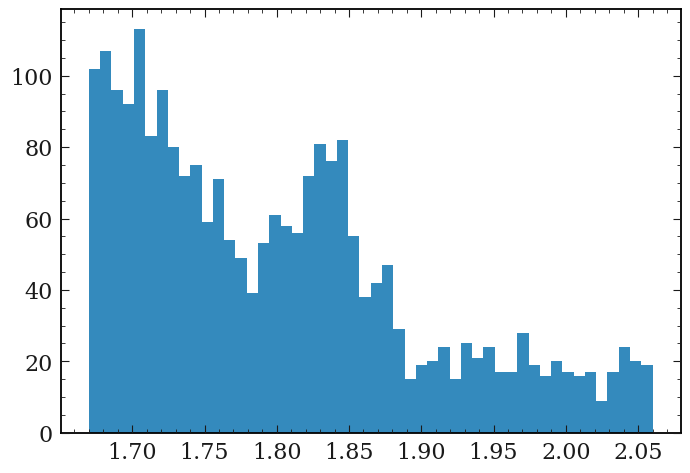

In [114]:
plt.hist(ccbar_bkg[var], xe)

In [104]:
len(s)

2357

<AxesSubplot:>

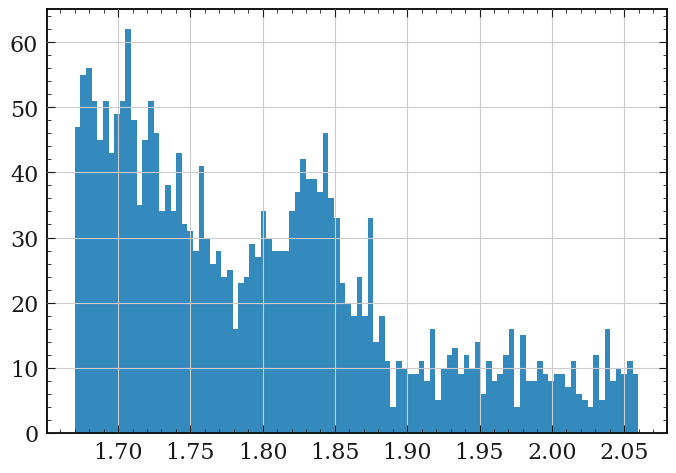

In [101]:
s = ccbar_bkg[var].dropna()
w = 100*(np.zeros_like(s) + 1. / len(s))
s.hist(bins=100,  cumulative=False)
# s.hist(bins=100,  cumulative=False, weights=w)


<AxesSubplot:>

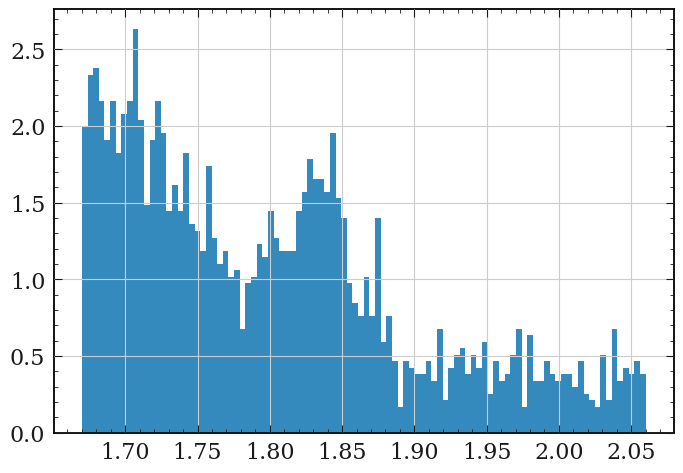

In [102]:
s.hist(bins=100,  cumulative=False, weights=w)


<AxesSubplot:>

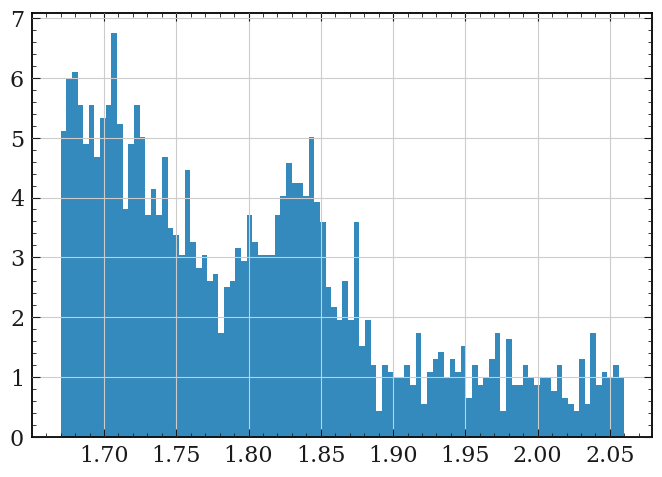

In [103]:
s.hist(bins=100, density=True)
